## Installing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.metrics import classification_report , accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Installing intel ONE API scikit learn library

In [2]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 12.2 MB/s eta 0:00:00


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#!pip install modin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
#import modin.pandas as md

In [4]:
df =pd.read_csv('/content/Crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [8]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


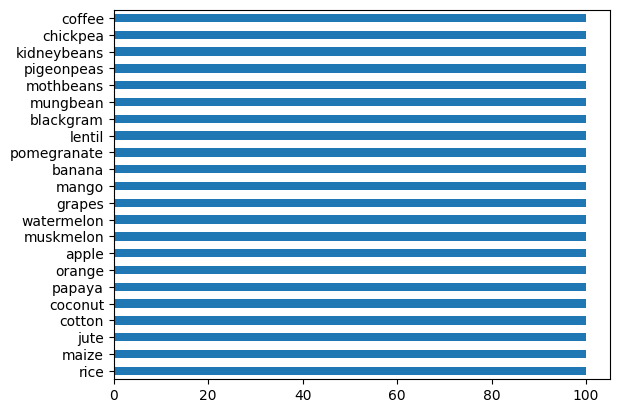

In [11]:
df["Label"].value_counts().plot.barh()
plt.show()

In [12]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


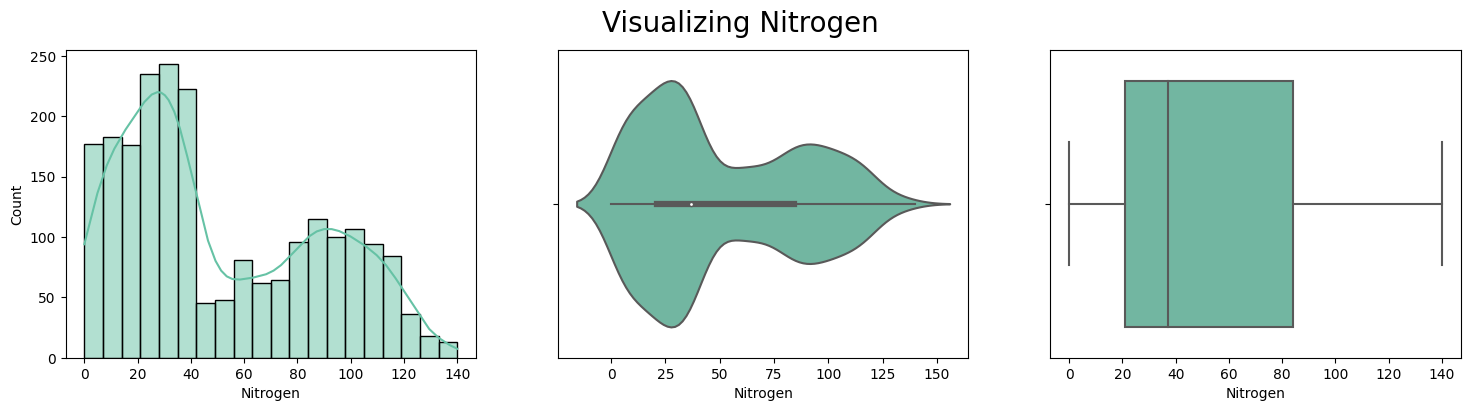

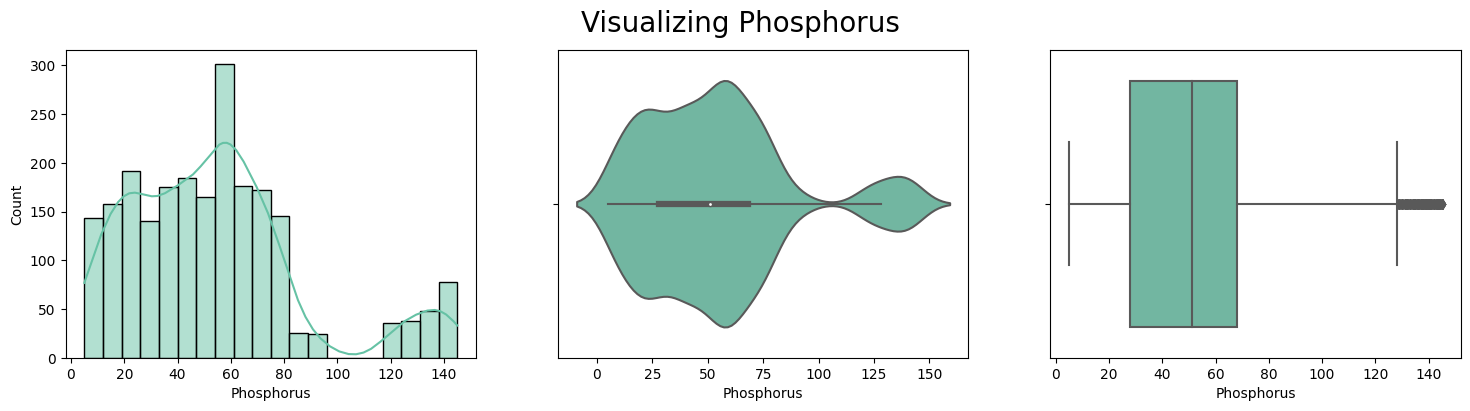

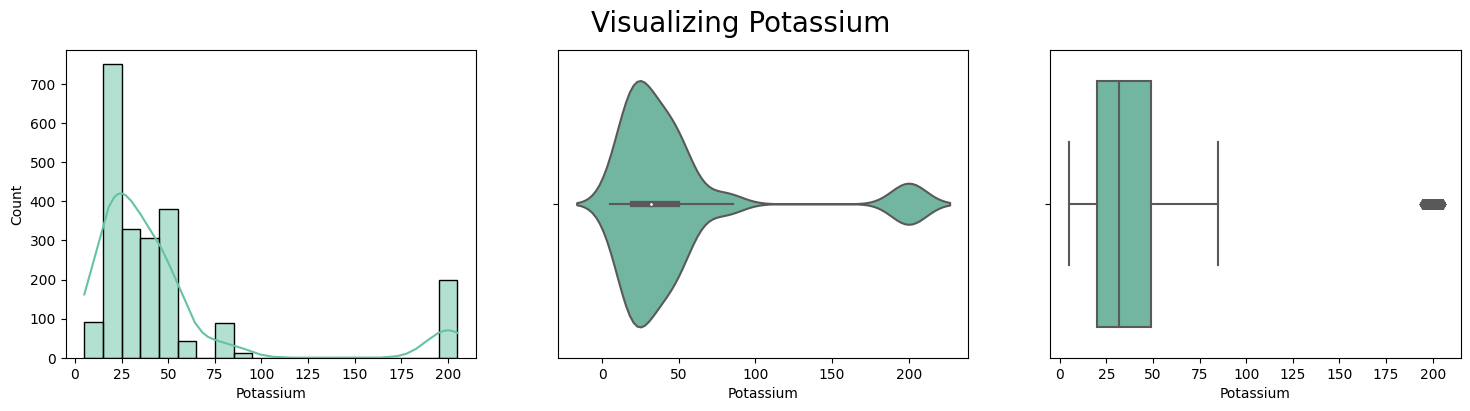

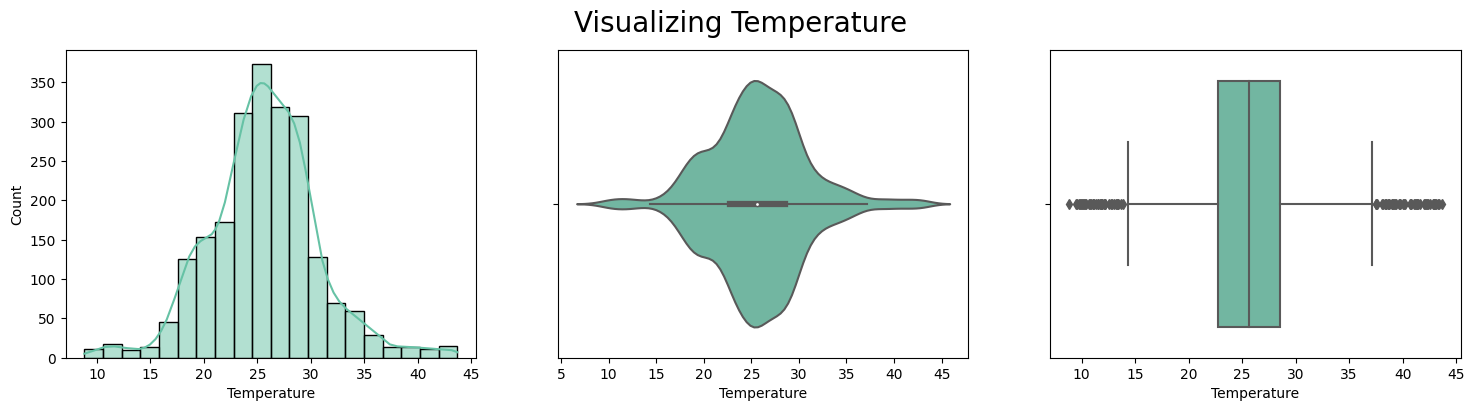

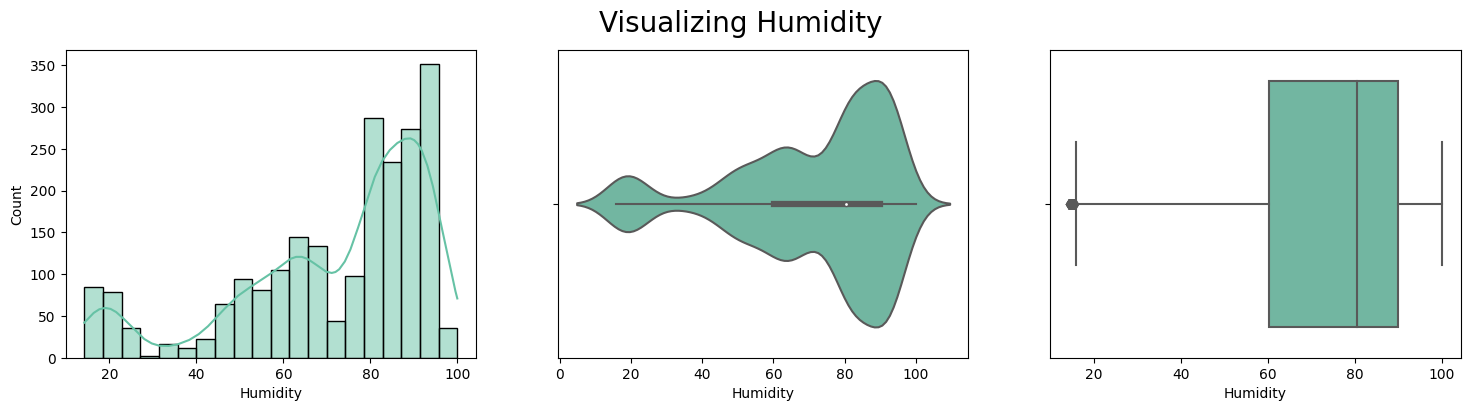

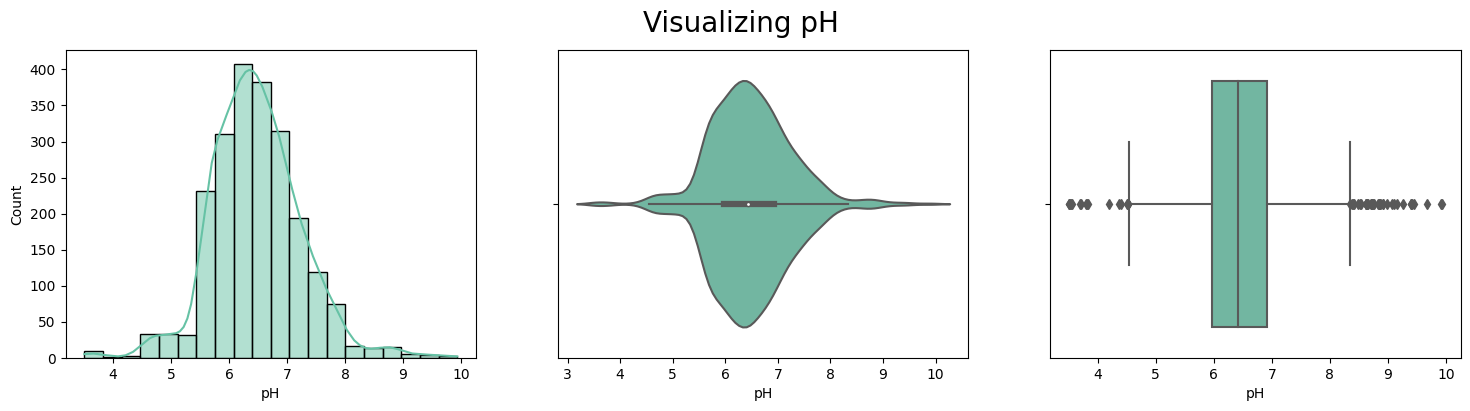

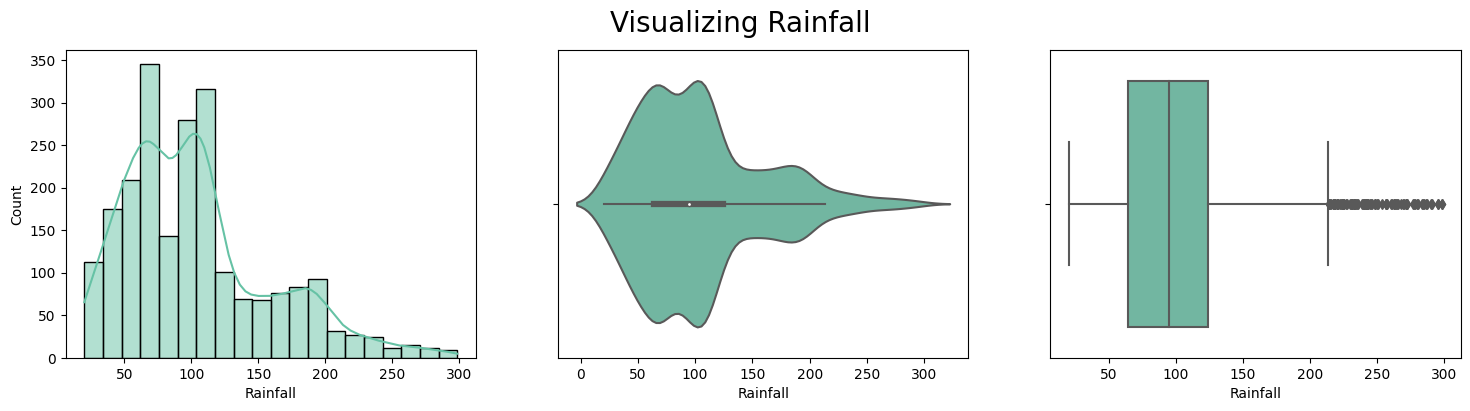

In [13]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax = plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data = df,x=i,kde = True,bins = 20,ax = ax[0])
    sns.violinplot(data = df,x = i,ax =ax[1])
    sns.boxplot(data = df,x = i,ax =ax[2])
    plt.suptitle(f'Visualizing {i}',size =20)

In [14]:
grouped = df.groupby(by = 'Label').mean().reset_index()
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [15]:
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops :')
    for j,k in grouped.sort_values(by = i,ascending =False)[:5][['Label',i]].values:
        print(f'{j}-->{k}')
    print(f'********************************')

Top 5 Most Nitrogen requiring crops :
cotton-->117.77
coffee-->101.2
muskmelon-->100.32
banana-->100.23
watermelon-->99.42
********************************
Top 5 Most Phosphorus requiring crops :
apple-->134.22
grapes-->132.53
banana-->82.01
lentil-->68.36
chickpea-->67.79
********************************
Top 5 Most Potassium requiring crops :
grapes-->200.11
apple-->199.89
chickpea-->79.92
watermelon-->50.22
muskmelon-->50.08
********************************
Top 5 Most Temperature requiring crops :
papaya-->33.7238587388
mango-->31.2087701513
blackgram-->29.9733396789
muskmelon-->28.663065756
mungbean-->28.5257747353
********************************
Top 5 Most Humidity requiring crops :
coconut-->94.84427180610001
papaya-->92.4033876826
muskmelon-->92.34280196089999
apple-->92.3333828756
orange-->92.17020876340001
********************************
Top 5 Most pH requiring crops :
chickpea-->7.33695662374
blackgram-->7.13395162948
orange-->7.01695745276
lentil-->6.927931571609999
cotton-

In [16]:

for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

Top 5 Least Nitrogen requiring crops:
********************************
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
********************************
Top 5 Least Phosphorus requiring crops:
********************************
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
********************************
Top 5 Least Potassium requiring crops:
********************************
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
********************************
Top 5 Least Temperature requiring crops:
********************************
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
********************************
Top 5 Least Humidity requiring crops:
********************************
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.0616330847
mang

In [17]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


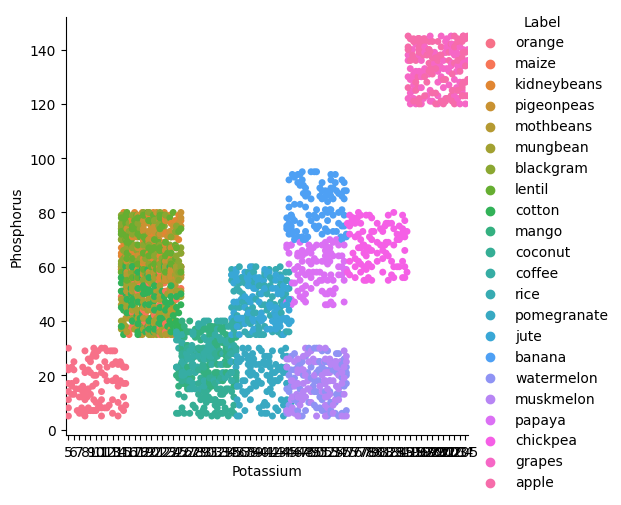

In [18]:
sns.catplot(data=df, x="Potassium", y="Phosphorus", hue="Label", kind="swarm")

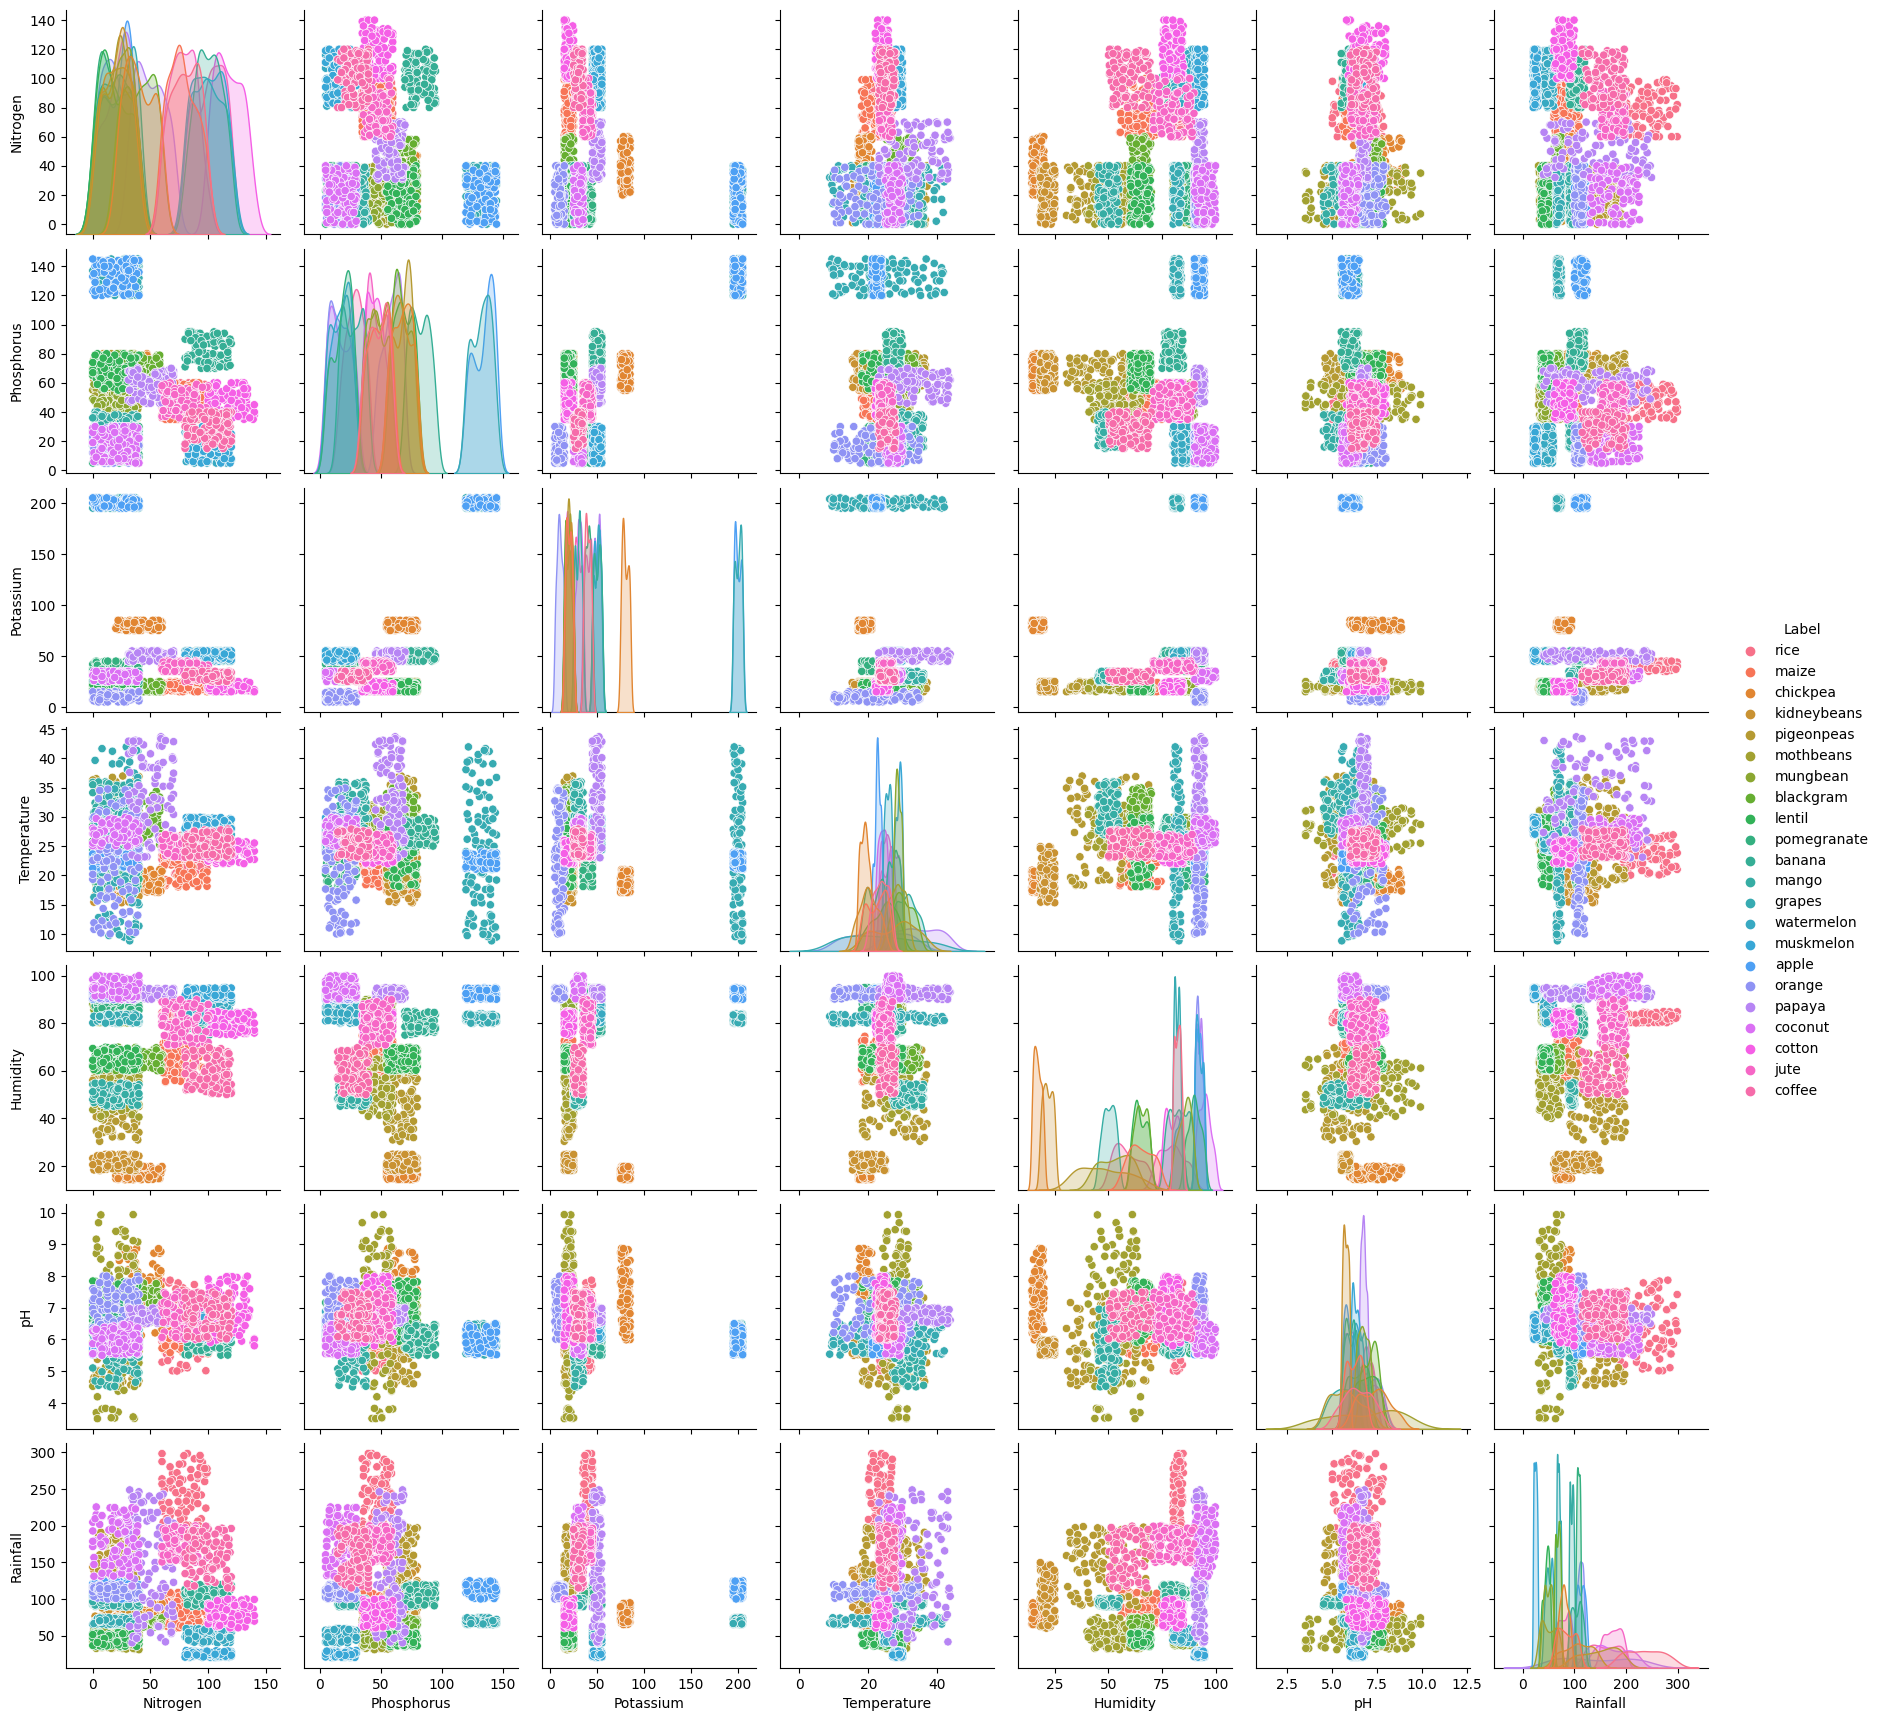

In [19]:
sns.pairplot(data = df ,hue = 'Label')
plt.show()


# Data

<Axes: >

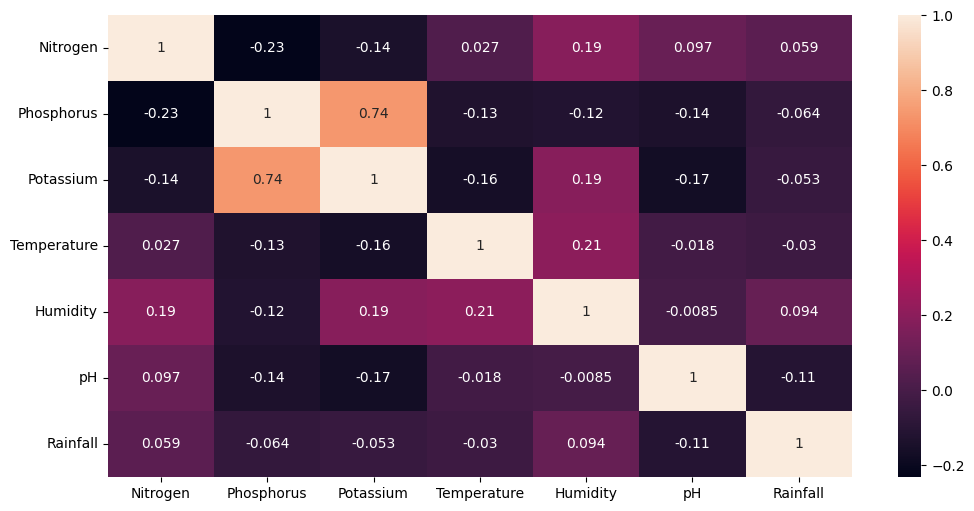

In [20]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True)

As observed from our heat map Potassium and Phosphorus has high corelation value of 0.74


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df.drop(['Label'],axis =1))
df_pca = pd.DataFrame(df_pca)
fig = px.scatter(x = df_pca[0],y = df_pca[1],color = df['Label'],title = "Decomposed Using PCA")
fig.show()


In [22]:
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['Label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['Label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [23]:
fig = px.scatter(x=df['Nitrogen'],y=df['Phosphorus'],color=df['Label'],title="Nitrogen VS Phosphorus")
fig.show()

In [24]:
fig = px.scatter(x=df['Phosphorus'],y=df['Potassium'],color=df['Label'],title="Phosphorus VS Potassium")
fig.show()

In [25]:
names = df['Label'].unique()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [26]:
X=df.drop(['Label'],axis=1)
y=df['Label']
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [29]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [30]:
!pip install lightgbm

In [ ]:
pip install --upgrade pandas


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
#import lightgbm as lgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier


In [32]:
models = {'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier(),
         'Tree': DecisionTreeClassifier(),
         "SVC": SVC(),
          "Linear SVC":LinearSVC(C=2),
          "NU SVC":NuSVC(),
         "XGBoost": XGBClassifier(),
         "KNN":KNeighborsClassifier(n_neighbors = 5, p=2),
          #"Light GBM": lgb.LGBMClassifier(),
          "LDA":LinearDiscriminantAnalysis(),
          "Gaussian NB":GaussianNB(),
          "AdaBoost":AdaBoostClassifier(),
          "Gradient Boosting":GradientBoostingClassifier(),
          "Bagging":BaggingClassifier(),
          "Extra Trees":ExtraTreesClassifier(),
          "Cat Boost":CatBoostClassifier(verbose=False)}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores

In [33]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

{'Logistic Regression': 0.9636363636363636,
 'Random Forest': 1.0,
 'Tree': 0.9954545454545455,
 'SVC': 0.9727272727272728,
 'Linear SVC': 0.8272727272727273,
 'NU SVC': 0.9454545454545454,
 'XGBoost': 0.9954545454545455,
 'KNN': 0.9772727272727273,
 'LDA': 0.9363636363636364,
 'Gaussian NB': 1.0,
 'AdaBoost': 0.14545454545454545,
 'Gradient Boosting': 0.990909090909091,
 'Bagging': 0.9954545454545455,
 'Extra Trees': 0.9954545454545455,
 'Cat Boost': 0.9954545454545455}

In [34]:
type(model_scores)

dict

In [35]:
def plot_dict_as_bar(dict_data, title=None):
    keys = list(dict_data.keys())
    values = list(dict_data.values())

    plt.bar(keys, values)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    if title:
        plt.title(title)
    # Rotate x-axis labels by 45 degrees for better alignment
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjusts the layout to prevent overlapping
    plt.show()

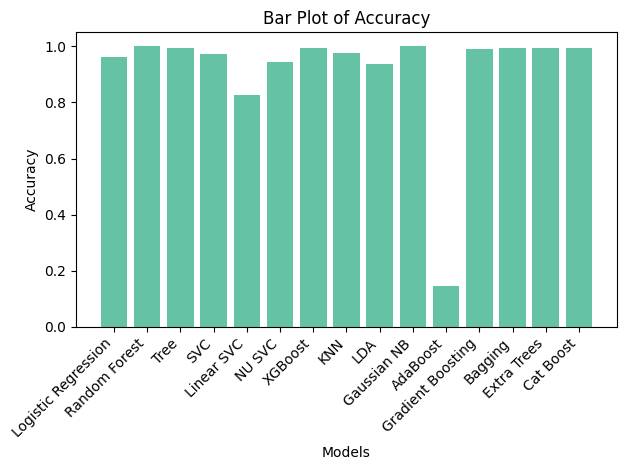

In [36]:
plot_dict_as_bar(model_scores,title = 'Bar Plot of Accuracy')

In [37]:
def cm_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    for name,model in models.items():
        print('**************   '+ name + '   ***********')
        y_pred = model.predict(X_test)

        Acc = accuracy_score(y_pred,y_test)
        cm = confusion_matrix(y_test,y_pred,labels = [0,1])
        print('Confusion Matrix')
        sns.heatmap(cm,cmap = 'Greens',annot = True,cbar_kws = {'orientation':'horizontal'})
        plt.show()

        print(classification_report(y_test,y_pred))
        print('.:.'+ name +' Accuracy'+'\033[1m {:.3f}%'.format(Acc*100)+' .:.')
        print('      ')
        print('      ')
        print('      ')


**************   Logistic Regression   ***********
Confusion Matrix


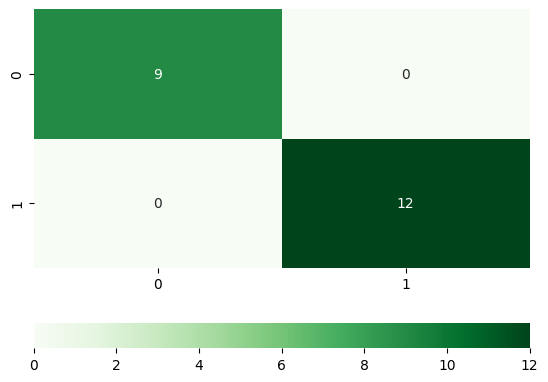

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.85      0.85      0.85        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         8
           8       0.85      1.00      0.92        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      0.83      0.91        12
          12       1.00      1.00      1.00         4
          13       0.83      0.91      0.87        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       0.92    

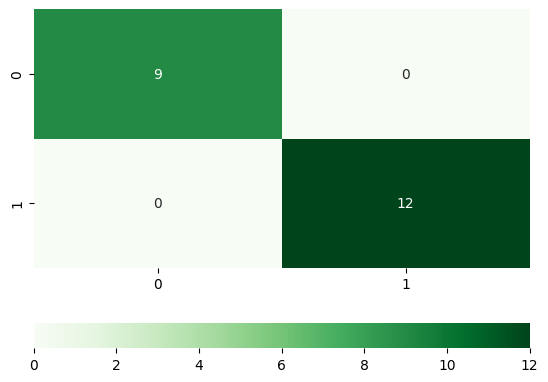

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

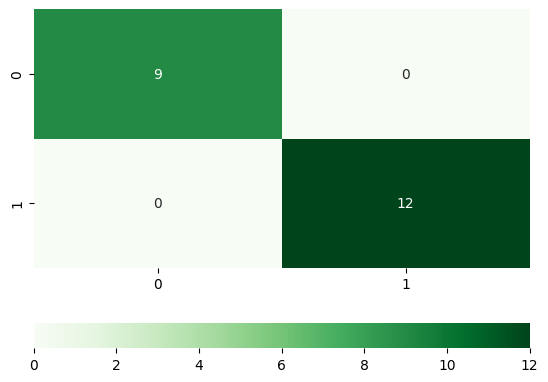

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

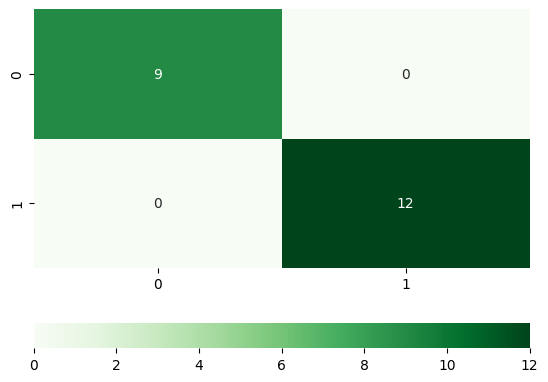

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.87      1.00      0.93        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         8
           8       0.85      1.00      0.92        11
           9       1.00      1.00      1.00        13
          10       0.88      1.00      0.93         7
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00         4
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

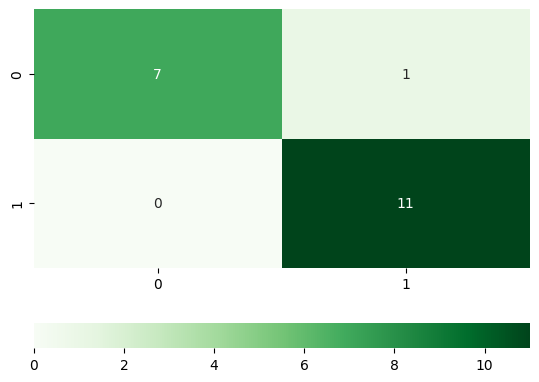

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.92      0.92      0.92        12
           2       0.55      0.85      0.67        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      0.33      0.50         6
           7       1.00      1.00      1.00         8
           8       0.50      0.09      0.15        11
           9       1.00      1.00      1.00        13
          10       1.00      0.71      0.83         7
          11       0.46      0.50      0.48        12
          12       1.00      1.00      1.00         4
          13       0.75      0.82      0.78        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       0.69    

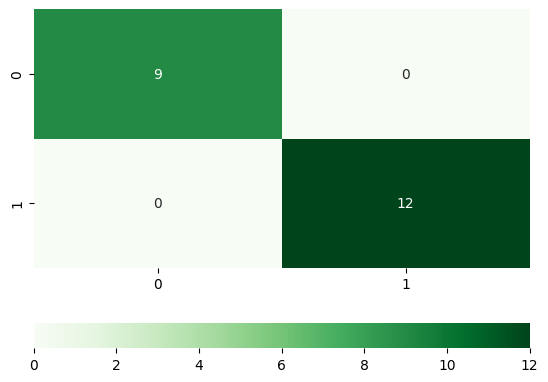

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.81      1.00      0.90        13
           3       1.00      1.00      1.00        13
           4       1.00      0.87      0.93        15
           5       1.00      1.00      1.00         9
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         8
           8       0.85      1.00      0.92        11
           9       1.00      1.00      1.00        13
          10       0.88      1.00      0.93         7
          11       1.00      0.92      0.96        12
          12       0.80      1.00      0.89         4
          13       1.00      0.82      0.90        11
          14       0.83      1.00      0.91        10
          15       1.00      1.00      1.00         7
          16       0.90      1.00      0.95         9
          17       1.00    

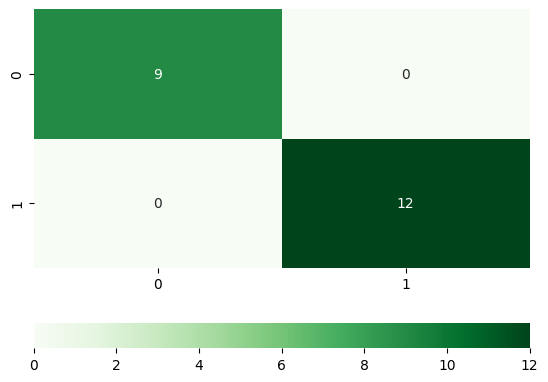

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

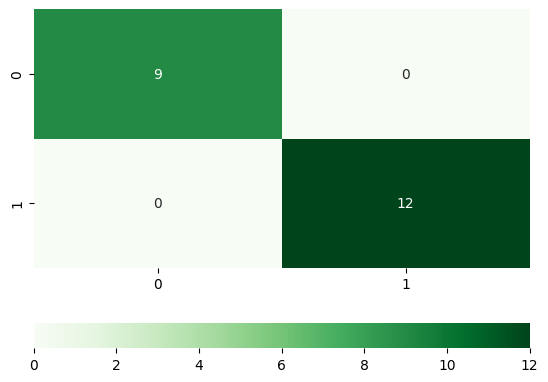

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         8
           8       0.79      1.00      0.88        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

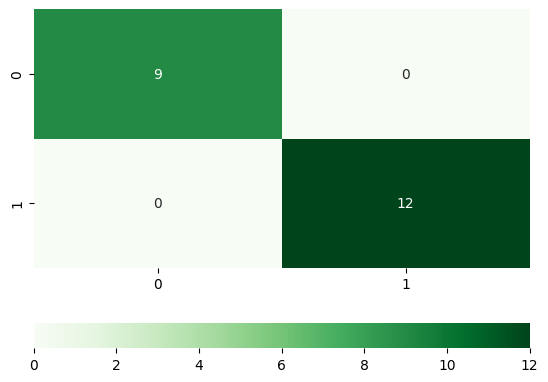

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.69      0.85      0.76        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         8
           8       0.79      1.00      0.88        11
           9       1.00      1.00      1.00        13
          10       0.60      0.86      0.71         7
          11       1.00      0.92      0.96        12
          12       0.80      1.00      0.89         4
          13       1.00      0.82      0.90        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

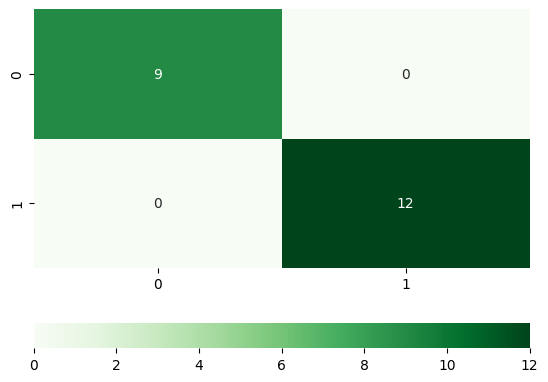

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

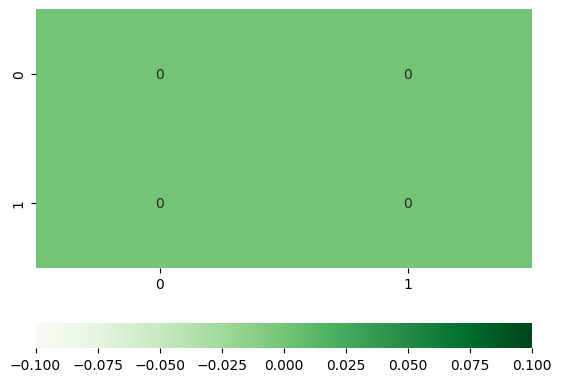

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         6
           7       0.47      1.00      0.64         8
           8       0.00      0.00      0.00        11
           9       0.50      1.00      0.67        13
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        12
          12       0.02      1.00      0.05         4
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        10
          15       1.00      1.00      1.00         7
          16       0.00      0.00      0.00         9
          17       0.00    

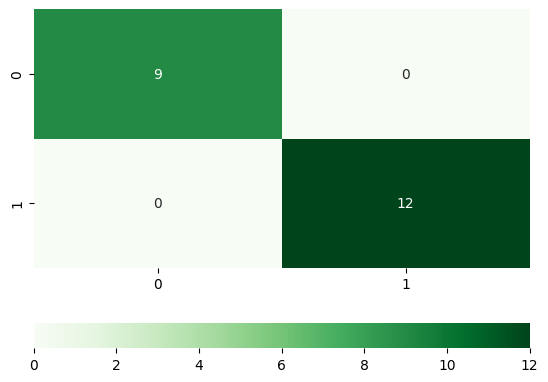

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

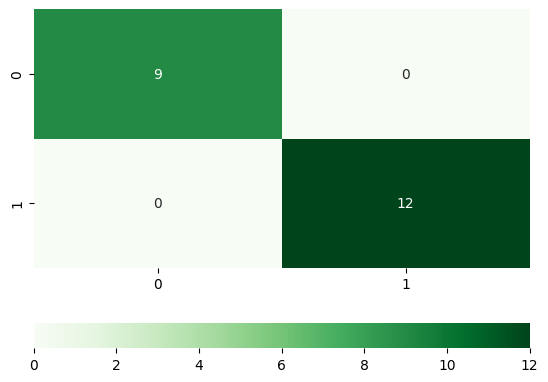

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

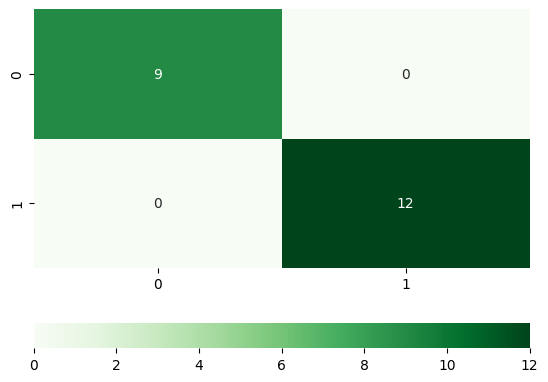

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      0.91      0.95        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

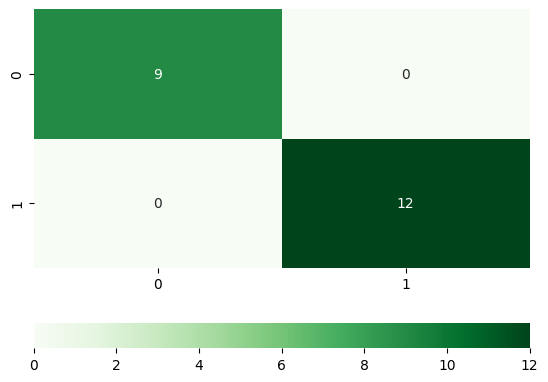

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

In [38]:
cm_and_score(models,X_train,X_test,y_train,y_test)